# Trabalho Resistência dos Materiais II

### Tema: Tranformação de tensão

#### Alunos: Abner Vieira Pereira e Sara Rodrigues Duarte Montenegro

---

O presente trabalho faz um estudo acerca de transformações de tensões através da linguagem de programação Python. Na primeira questão, será feito um gráfico que mostra o comportamento das tensões quando são rotacionadas em um ângulo $\theta$, que varia de 0 até 360°, na segunda, será feito um cálculo das tensões normais e de cisalhamento de um determinado elemento rotacionado em um ângulo theta de -30°, utilizando a matriz de rotação e o método analítico, e, por fim, a terceira questão visa obter as tensões principais e a suas direções utilizando o tensor de tensões de Cauchy, visto que os autovalores representam as tensões principais e os autovetores, as suas direções. 

In [1]:
from sympy import *
import sympy as sy
from numpy import *
import numpy as np 
import sympy.physics.mechanics as me
import matplotlib.pyplot as plt

### Questão 1 :
Plote as curvas no mesmo gráfico das componentes de tensões normais (sigma x´ e sigma y´) e cisalhante (sigma x´y´) em função do ângulo de rotação (theta) variando de 0 a 360° (sistema de coordenadas rotacionado x´y´ no sentido anti-horário). Indicar corretamente as unidades das variáveis de cada eixo. Use os seguintes valores de tensão (imputs):  sigma x =  -20 MPa,  sigma y = 90 MPa e sigma xy = 60 MPa. Explicar detalhadamente as características (comportamento) de cada curva e as tensões normais e cisalhante máximas e mínimas.  

In [2]:
# Declarando variáveis:
sig_x, sig_y, tau_xy, sig_xl, sig_yl, tau_xyl, theta = sy.symbols('sigma_x sigma_y Tau_xy sigma_xl sig_yl Tau_xyl theta')

In [3]:
# Escevendo as equaçõs para as tensões nas direções rotacionadas no ângulo theta:
sig_xl = ((sig_x + sig_y)/2) + ((sig_x - sig_y)/2)*sy.cos(2*theta) + tau_xy*sy.sin(2*theta)
sig_yl = ((sig_x + sig_y)/2) - ((sig_x - sig_y)/2)*sy.cos(2*theta) - tau_xy*sy.sin(2*theta)
tau_xyl = -(((sig_x - sig_y)/2)*sy.sin(2*theta)) + tau_xy*sy.cos(2*theta)

In [4]:
#criando um dicionário para substituir, nas equações acima, os dados informados no exercício:
dic_q1 = {sig_x:-20, sig_y:90, tau_xy: 60}

In [5]:
Eq1_q1 = sig_xl.subs(dic_q1)
Eq1_q1

60*sin(2*theta) - 55*cos(2*theta) + 35

In [6]:
Eq2_q1 = sig_yl.subs(dic_q1)
Eq2_q1

-60*sin(2*theta) + 55*cos(2*theta) + 35

In [7]:
Eq3_q1 = tau_xyl.subs(dic_q1)
Eq3_q1

55*sin(2*theta) + 60*cos(2*theta)

In [8]:
tn = np.linspace(0,10,1000) #criando o tempo numérico
lam_f = sy.lambdify(theta,Eq1_q1) #criando uma função
lam_f1 = sy.lambdify(theta,Eq2_q1) 
lam_f2 = sy.lambdify(theta,Eq3_q1)
sol_1 = lam_f(tn) #
sol_2 = lam_f1(tn)
sol_3 = lam_f2(tn)

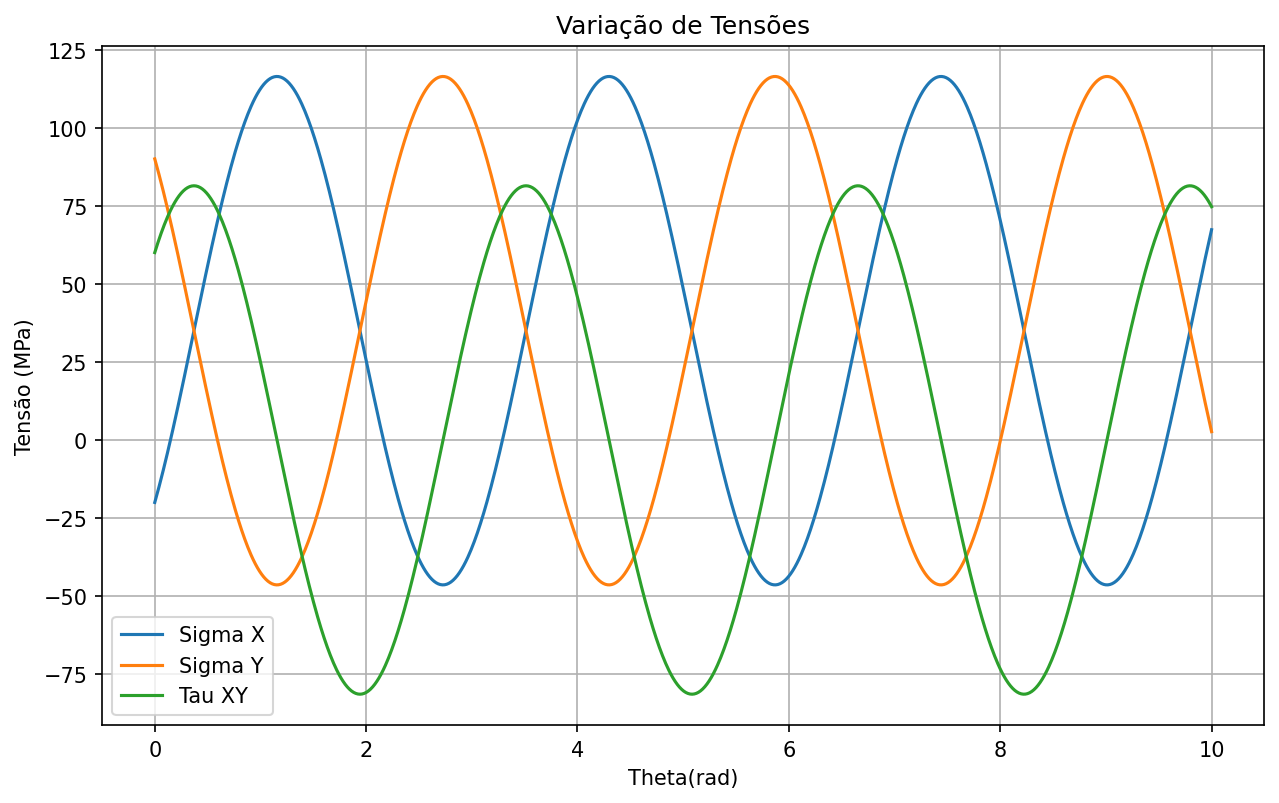

In [9]:
plt.figure(figsize=(10,6),dpi=150)
plt.plot(tn,sol_1, label = 'Sigma X')
plt.plot(tn,sol_2, label = 'Sigma Y')
plt.plot(tn,sol_3, label = 'Tau XY')
plt.title('Variação de Tensões')
plt.ylabel('Tensão (MPa)')
plt.xlabel('Theta(rad)')
plt.grid(True)
plt.legend()

##### Discussão:


Comparando as curvas do gráfico acima, nota-se que há defasagem de 90° entre as curvas relativas às tensões normais máximas sigma 1 e sigma 2. Também é possível perceber, qualitativamente, que quando temos os valores máximos das tensões normais, a tensão de cisalhamento é nula; já quando a tensão de cisalhamento é máxima, a tensão normal é média.

---

### Questão 2 :
Determinar as tensões (normais e de cisalhamento) de um elemento rotacionado de um determinado ângulo theta usando a matriz de rotação Q e as equações analíticas: Comparar com o exemplo 9.2 do Hibbeler/7a edição em que theta = -30°.  

In [10]:
# criando os símbolos:
sig_xq2, sig_yq2, sig_xq2l, sig_yq2l, tau_xyq2, tau_xyq2l, theta_q2 = sy.symbols('sigma_x, sigma_y, sig_xl, sig_yl, tau_xy, tau_xyl theta') 

In [11]:
# Pegando os valores de entrada (tensões no eixo de referência):
sig_xq2 = float(input('Digite o valor da tensão normal x em MPa: '))
sig_yq2 = float(input('Digite o valor da tensão normal y em MPa: '))
tau_xyq2 = float(input('Digite o valor da tensão cisalhante em MPa: '))

Digite o valor da tensão normal x em MPa:  -80
Digite o valor da tensão normal y em MPa:  50
Digite o valor da tensão cisalhante em MPa:  -25


In [12]:
# Atribuindo valor à theta:
theta_q2 = -np.pi/6

* Resolvendo pelo método analítico:

In [13]:
# Escevendo as equaçõs para as tensões nas direções rotacionadas no ângulo theta:
sig_xq2l = ((sig_xq2 + sig_yq2)/2) + ((sig_xq2 - sig_yq2)/2)*sy.cos(2*theta_q2) + tau_xyq2*sy.sin(2*theta_q2)
sig_yq2l = ((sig_xq2 + sig_yq2)/2) - ((sig_xq2 - sig_yq2)/2)*sy.cos(2*theta_q2) - tau_xyq2*sy.sin(2*theta_q2)
tau_xyq2l = -(((sig_xq2 - sig_yq2)/2)*sy.sin(2*theta_q2)) + tau_xyq2*sy.cos(2*theta_q2)

In [14]:
print(f'O valor de σ_x é {sig_xq2l} MPa')

O valor de σ_x é -25.8493649053890 MPa


In [15]:
print(f'O valor de σ_y é {sig_yq2l} MPa')

O valor de σ_y é -4.15063509461096 MPa


In [16]:
print(f'O valor de τ_xy é {tau_xyq2l} MPa')

O valor de τ_xy é -68.7916512459885 MPa


* Usando o tensor tensão de Cauchy:

In [17]:
sig = np.array([[sig_xq2,tau_xyq2,0],[tau_xyq2,sig_yq2,0],[0,0,0]])
sig

array([[-80., -25.,   0.],
       [-25.,  50.,   0.],
       [  0.,   0.,   0.]])

In [18]:
#Escrevendo a matriz de rotação:
rot = np.array([[np.cos(theta_q2), np.sin(theta_q2),0],[-np.sin(theta_q2),np.cos(theta_q2),0],[0,0,1]])
rot

array([[ 0.8660254, -0.5      ,  0.       ],
       [ 0.5      ,  0.8660254,  0.       ],
       [ 0.       ,  0.       ,  1.       ]])

In [19]:
#Escrevendo a matriz transposta da matriz de rotação:
rot_t = rot.T
rot_t

array([[ 0.8660254,  0.5      ,  0.       ],
       [-0.5      ,  0.8660254,  0.       ],
       [ 0.       ,  0.       ,  1.       ]])

In [20]:
#Calculando o tensor de tensões no sistema rotacionado:
np.set_printoptions(precision=3, suppress=True)
sigma_lq2 = rot @ sig @ rot_t
sigma_lq2

array([[-25.849, -68.792,   0.   ],
       [-68.792,  -4.151,   0.   ],
       [  0.   ,   0.   ,   0.   ]])

##### Discussão: 


Portanto, conclui-se que ambos os métodos são válidos para se descobrir os valores das tensões quando são rotacionadas em um ângulo $\theta = -30°$

---

### Questão 3 :
Determinar as tensões principais e as direções principais usando o cálculo de autovalor e autovetor. Sugestão: Use os dados e compare com o exemplo 9.5 do Hibbeler/7a edição. Use também os dados do item 1) acima e compare os resultados.  

In [21]:
#criando os simbolos para as tensões normais e cisalhante no sistema de referência cartesiano
sigma_x,sigma_y,Tau_xy, theta = sy.symbols('sigma_x sigma_y tau_xy theta')

In [22]:
#criando símbolos para as tensões no sistema rotacionado:
sigma_x2, sigma_y2, Tau_x2y2 = sy.symbols('sigma_x2 sigma_y2 Tau_x2y2')

* Escrevendo as fórmulas para as tensões normais no sistema rotacionado:

In [23]:
sigma_x2 = ((sigma_x + sigma_y)/2) + (((sigma_x - sigma_y)/2)*sy.cos(2*theta)) + (Tau_xy*sy.sin(2*theta))
sigma_x2

sigma_x/2 + sigma_y/2 + tau_xy*sin(2*theta) + (sigma_x/2 - sigma_y/2)*cos(2*theta)

In [24]:
sigma_y2 = ((sigma_x + sigma_y)/2) - (((sigma_x - sigma_y)/2)*sy.cos(2*theta)) - (Tau_xy*sy.sin(2*theta))
sigma_y2

sigma_x/2 + sigma_y/2 - tau_xy*sin(2*theta) - (sigma_x/2 - sigma_y/2)*cos(2*theta)

In [25]:
Tau_x2y2 = -((sigma_x - sigma_y)/2)*sy.sin(2*theta) + (Tau_xy*sy.cos(2*theta))
Tau_x2y2

tau_xy*cos(2*theta) + (-sigma_x/2 + sigma_y/2)*sin(2*theta)

</br>
Calculando as tenões normais e de cisalhamento máximas de forma analítica:

* Resolvendo para $\sigma_x$ :

In [26]:
#Derivando a equação:
eq1 = sigma_x2.diff(theta)
eq1 

2*tau_xy*cos(2*theta) - 2*(sigma_x/2 - sigma_y/2)*sin(2*theta)

In [27]:
#Igualando a equação acima a zero:
eq2 = sy.Eq(2*Tau_xy*sy.cos(2*theta)-(sigma_x/2 - sigma_y/2)*sy.sin(2*theta)*2,0)
eq2

Eq(2*tau_xy*cos(2*theta) - 2*(sigma_x/2 - sigma_y/2)*sin(2*theta), 0)

In [28]:
#Resolvendo para theta:
sol1 = solve(eq2,theta)
sol1 

[atan((-sigma_x + sigma_y + sqrt(sigma_x**2 - 2*sigma_x*sigma_y + sigma_y**2 + 4*tau_xy**2))/(2*tau_xy)),
 -atan((sigma_x - sigma_y + sqrt(sigma_x**2 - 2*sigma_x*sigma_y + sigma_y**2 + 4*tau_xy**2))/(2*tau_xy))]

* Resolvendo para $\sigma_y$ :

In [29]:
eq3 = sigma_y2.diff(theta)
eq3

-2*tau_xy*cos(2*theta) - 2*(-sigma_x/2 + sigma_y/2)*sin(2*theta)

In [30]:
eq4 = sy.Eq(-2*Tau_xy*sy.cos(2*theta)-(-sigma_x/2 + sigma_y/2)*sy.sin(2*theta)*2,0)
eq4

Eq(-2*tau_xy*cos(2*theta) - 2*(-sigma_x/2 + sigma_y/2)*sin(2*theta), 0)

In [31]:
sol2 = solve(eq4,theta)
sol2

[atan((-sigma_x + sigma_y + sqrt(sigma_x**2 - 2*sigma_x*sigma_y + sigma_y**2 + 4*tau_xy**2))/(2*tau_xy)),
 -atan((sigma_x - sigma_y + sqrt(sigma_x**2 - 2*sigma_x*sigma_y + sigma_y**2 + 4*tau_xy**2))/(2*tau_xy))]

* Resolvendo para a $\tau_{xy}$ :

In [32]:
eq5 = Tau_x2y2.diff(theta)
eq5

-2*tau_xy*sin(2*theta) + 2*(-sigma_x/2 + sigma_y/2)*cos(2*theta)

In [33]:
eq6 = sy.Eq(-2*Tau_xy*sy.sin(2*theta) + (-sigma_x/2 + sigma_y/2)*sy.cos(2*theta)*2,0)
eq6

Eq(-2*tau_xy*sin(2*theta) + 2*(-sigma_x/2 + sigma_y/2)*cos(2*theta), 0)

In [34]:
sol3 = solve(eq6, theta)
sol3

[atan((2*tau_xy - sqrt(sigma_x**2 - 2*sigma_x*sigma_y + sigma_y**2 + 4*tau_xy**2))/(sigma_x - sigma_y)),
 atan((2*tau_xy + sqrt(sigma_x**2 - 2*sigma_x*sigma_y + sigma_y**2 + 4*tau_xy**2))/(sigma_x - sigma_y))]

##### Usando os dados do Exemplo 9.5 do Hibbeler/7ª edição:

* Fornecendo uma resposta numérica:

In [35]:
sig_x = int(input('Informe o valor da tensão normal em x em MPa: '))
sig_y = int(input('Informe o valor da tensão normal em y em MPa: '))
tau = int(input('Informe o valor da tensão de cisalhamento no sistema de coordenadas de referência em MPa: '))
th = int(input('Informe o valor da rotação do sistema de coordenada (ângulo theta): '))

Informe o valor da tensão normal em x em MPa:  -20
Informe o valor da tensão normal em y em MPa:  90
Informe o valor da tensão de cisalhamento no sistema de coordenadas de referência em MPa:  60
Informe o valor da rotação do sistema de coordenada (ângulo theta):  23


In [36]:
th = th*(np.pi)/180
th

0.40142572795869574

In [37]:
#Criando um dicionário para substituir os valores fornecidos nas fórmulas encontradas
dic1 = {sigma_x:sig_x,sigma_y:sig_y,Tau_xy:tau, theta:th}
dic2 = {sigma_x:sig_x,sigma_y:sig_y,Tau_xy:tau}

* Obtendo os valores das tensões no sistema de coordenadas rotacionado no ângulo theta informado pelo usuário:

In [38]:
sigma_xl = sigma_x2.subs(dic1)
sigma_xl.round(2)

39.95

In [39]:
sigma_yl = sigma_y2.subs(dic1)
sigma_yl.round(2)

30.05

In [40]:
tau_xyl = Tau_x2y2.subs(dic1)
tau_xyl.round(2)

81.24

</br>
* Obtendos as direções máximas para as tensões normais:

In [41]:
sol1_num1 = sol1[0].subs(dic2)
print(f'O valor de θp1 é {sol1_num1.evalf()*180/np.pi}°.')

O valor de θp1 é 66.2552235390004°.


In [42]:
sol1_num2 = sol1[1].subs(dic2)
print(f'O valor de θp2 é {sol1_num2.evalf()*180/np.pi}°.')

O valor de θp2 é -23.7447764609996°.


* Obtendo as direções máximas para a tensão de cisalhamento $ \tau_{xy}$

In [43]:
sol3_num1 = sol3[0].subs(dic2)
sol3_num1.evalf()*180/np.pi

21.2552235390004

In [44]:
sol3_num2 = sol3[1].subs(dic2)
sol3_num2.evalf()*180/np.pi

-68.7447764609996

</br>
Para obtermos as tensões máximas, basta substituir o valor da máxima direção nas equações das tensões com o sistema rotacionado:

In [45]:
#criando símbolos para armazenar os ângulos
thp1, thp2 = sy.symbols('theta_p1 theta_p2')

In [46]:
#Fazendo um dicionário para determinar as tensões principais
dic3 = {sigma_x:sig_x, sigma_y:sig_y, Tau_xy:tau, thp1:sol1_num1, thp2:sol1_num2}

* Fazendo para $ \theta_{P1} $:

In [47]:
sigma_x2max = ((sigma_x + sigma_y)/2) + (((sigma_x - sigma_y)/2)*sy.cos(2*thp1)) + (Tau_xy*sy.sin(2*thp1))
print(f'O valor da tensão principal σ1 é {sigma_x2max.subs(dic3).evalf().round(3)} MPa.')

O valor da tensão principal σ1 é 116.394 MPa.


* Fazendo para $\theta_{P2}$:

In [48]:
sigma_y2max = ((sigma_x + sigma_y)/2) + (((sigma_x - sigma_y)/2)*sy.cos(2*thp2)) + (Tau_xy*sy.sin(2*thp2))
print(f'O valor da tensão principal σ2 é {sigma_y2max.subs(dic3).evalf().round(3)} MPa.')

O valor da tensão principal σ2 é -46.394 MPa.


Fazendo o cálculo das tensões principais utilizando outras fórmulas:

In [49]:
sig_1 = ((sigma_x+sigma_y)/2)+(((sigma_x-sigma_y)/2)**2 + Tau_xy**2)**0.5
print(f'σ1 = {sig_1.subs(dic3).evalf().round(3)} MPa.')

σ1 = 116.394 MPa.


In [50]:
sig_1 = ((sigma_x+sigma_y)/2)-(((sigma_x-sigma_y)/2)**2 + Tau_xy**2)**0.5
print(f'σ2 = {sig_1.subs(dic3).evalf().round(3)} MPa.')

σ2 = -46.394 MPa.


Portanto, conclui-se que a tensão principal, $\sigma_1$ age na direção $\theta_{p1}$, enquanto a tensão principal $\sigma_x$ age na direção $\theta_{p2}$.

##### Usando o tensor de tensões de Cauchy:

In [51]:
#Escrevendo a matriz que representa o tensor de tensões no sistemas de coordenadas de referência(x-y):
sigma = np.array([[sig_x,tau,0],[tau,sig_y,0],[0,0,0]])
sigma

array([[-20,  60,   0],
       [ 60,  90,   0],
       [  0,   0,   0]])

In [52]:
#Escrevendo a matriz de rotação:
rot = np.array([[np.cos(th), np.sin(th),0],[-np.sin(th),np.cos(th),0],[0,0,1]])
rot

array([[ 0.921,  0.391,  0.   ],
       [-0.391,  0.921,  0.   ],
       [ 0.   ,  0.   ,  1.   ]])

In [53]:
#Escrevendo a matriz transposta da matriz de rotação:
rot_t = rot.T
rot_t

array([[ 0.921, -0.391,  0.   ],
       [ 0.391,  0.921,  0.   ],
       [ 0.   ,  0.   ,  1.   ]])

In [54]:
#Calculando o tensor de tensões no sistema rotacionado:
np.set_printoptions(precision=3, suppress=True)
sigma_l = rot @ sigma @ rot_t
sigma_l

array([[39.954, 81.243,  0.   ],
       [81.243, 30.046,  0.   ],
       [ 0.   ,  0.   ,  0.   ]])

In [55]:
autovalores, autovetores = np.linalg.eig(sigma_l)

In [56]:
autovalores

array([116.394, -46.394,   0.   ])

In [57]:
print(f"σ1 vale: {autovalores[1]} Mpa")

σ1 vale: -46.39410298049852 Mpa


In [58]:
print(f"σ2 vale: {autovalores[0]} Mpa")

σ2 vale: 116.39410298049853 Mpa


In [59]:
autovetores

array([[ 0.728, -0.685,  0.   ],
       [ 0.685,  0.728,  0.   ],
       [ 0.   ,  0.   ,  1.   ]])

In [60]:
autovetores[1][0]

0.6852493915699815

In [61]:
dir2 = atan((autovetores[1][1])/(autovetores[1][0]))
x2 = 180*dir2/pi*0.5
print(f'θp = {x2}°')

θp = 23.3723882304998°


In [62]:
dir1 = atan((autovetores[0][1])/(autovetores[0][0]))
x1 = 180*dir1/pi*0.5
print(f'θs = {x1}°')

θs = -21.6276117695002°


##### Discussão:
Os dados do item 1 são os mesmos apresentados no exemplo 9.5 do Hibbeler. Portanto, os valores encontrados serão os mesmos para ambos exemplos.
Entretanto, podemos comparar os métodos utilizados: tensor tensão, método análitico e método gráfico (aplicado no item 1). 

Obtêve-se valores muito próximos entre o método analítico e o tensor tensão, o que comprova a validação das duas abordagens.
Já o método gráfico é fruto do método analítico, e mostra de uma maneira mais visual o comportamento das tensões conforme a variação do ângulo.